In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [62]:
#Loading and visualising data

dataInputPath = '/media/anastasis/My Harddisk2/ThesisImages/'
progressPathInput = os.path.join(dataInputPath, 'OAI_DESS_progress/')
controlPathInput = os.path.join(dataInputPath, 'OAI_DESS_controls/')

dataOutputPath = '/media/anastasis/My Harddisk2/ThesisImages/'
imageSliceOutput = os.path.join(dataOutputPath, 'OAI_DESS_progress_slices/')
controlSliceOutput = os.path.join(dataOutputPath, 'OAI_DESS_controls_slices/')

#Slicing and saving
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

SLICE_DECIMATE_IDENTIFIER = 3

In [46]:
# Load image and see max min Hounsfield units
progressPath = os.path.join(progressPathInput, '9002316_DESS_L.nii.gz')
img_progress = nib.load(progressPath).get_fdata()
np.min(img_progress), np.max(img_progress), img_progress.shape, type(img_progress)

(0.0, 1322.0, (384, 384, 160), numpy.ndarray)

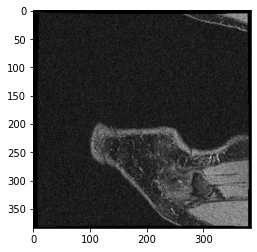

In [47]:
progressSlice = img_progress[:,:,150]
plt.imshow(progressSlice, cmap='gray')
plt.show()

In [48]:
# Load image and see max min Hounsfield units
controlPath = os.path.join(controlPathInput, '9001400_DESS_R.nii.gz')
img_control = nib.load(controlPath).get_fdata()
np.min(img_control), np.max(img_control), img_control.shape, type(img_control)

(0.0, 2162.0, (384, 384, 160), numpy.ndarray)

In [50]:
# Normalize image
def normalizeImageIntensityRange(img):
#     img[img < INTENSITY_MIN] = INTENSITY_MIN
#     img[img > INTENSITY_MAX] = INTENSITY_MAX
    INTENSITY_MIN = np.min(img)
    INTENSITY_RANGE = np.max(img)-np.min(img)
    img = (img - INTENSITY_MIN) / INTENSITY_RANGE
    img *= 255
    return img

nImgPro = normalizeImageIntensityRange(img_progress)
print(np.min(nImgPro), np.max(nImgPro), nImgPro.shape, type(nImgPro))

nImgCtrl = normalizeImageIntensityRange(img_progress)
print(np.min(nImgCtrl), np.max(nImgCtrl), nImgCtrl.shape, type(nImgCtrl))


0.0 255.0 (384, 384, 160) <class 'numpy.ndarray'>
0.0 255.0 (384, 384, 160) <class 'numpy.ndarray'>


In [51]:
# Read image or mask volume
def readImageVolume(progressPath, normalize=False):
    img = nib.load(progressPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(progressPath, normalize=True)


array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [54]:
# Save volume slice to file
def saveSliceImage(img, fname, path, normalizeIndividual=False):
    if normalizeIndividual:
        img = normalizeImageIntensityRange(img)
        #img = np.uint8(img * 255)
        fout = os.path.join(path, f'{fname}.png')
        cv2.imwrite(fout, img)
        print(f'[+] Slice saved: {fout}', end='\r')
    else:
        #img = np.uint8(img * 255)
        fout = os.path.join(path, f'{fname}.png')
        cv2.imwrite(fout, img)
        print(f'[+] Slice saved: {fout}', end='\r')
    
    
saveSliceImage(img_progress[:,:,75], 'test_img', imageSliceOutput, normalizeIndividual=True)
print((img_progress[:,:,75].dtype))

float64ce saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress_slices/test_img.png


In [55]:
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSliceImage(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path, normalizeIndividual=True)
            
    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSliceImage(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path, normalizeIndividual=True)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSliceImage(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path, normalizeIndividual=True)
    return cnt

In [63]:
import re
progress_ID = []
for index, filename in enumerate(sorted(glob.glob(progressPathInput+'*.nii.gz'))):
    patient_ID = (re.findall(r'(\d+).',filename)[1])
    # print(filename)
    # print(patient_ID)
    if filename.endswith('_R.nii.gz'):
        patient_ID_SIDE = patient_ID + str('_R')
    elif filename.endswith('_L.nii.gz'):
        patient_ID_SIDE = patient_ID + str('_L')
    # print(patient_ID_SIDE)
    progress_ID.append(patient_ID_SIDE)
    # if index == 5:
    #     break

np.shape(progress_ID), progress_ID[-1]

((159,), '9988421_R')

In [65]:
import re
control_ID = []
for index, filename in enumerate(sorted(glob.glob(controlPathInput+'*.nii.gz'))):
    patient_ID = (re.findall(r'(\d+).',filename)[1])
    # print(filename)
    # print(patient_ID)
    if filename.endswith('_R.nii.gz'):
        patient_ID_SIDE = patient_ID + str('_R')
    elif filename.endswith('_L.nii.gz'):
        patient_ID_SIDE = patient_ID + str('_L')
    # print(patient_ID_SIDE)
    control_ID.append(patient_ID_SIDE)
    # if index == 5:
    #     break

np.shape(control_ID), control_ID[-1]

((434,), '9995338_R')

In [39]:
# Read and process image volumes
for index, filename in enumerate(sorted(glob.iglob(progressPathInput+'*.nii.gz'))):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, progress_ID[index], imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress/9002316_DESS_L.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress_slices/9002316_L-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress/9002316_DESS_L.nii.gz, 160 slices created 

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress/9014209_DESS_L.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress_slices/9014209_L-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress/9014209_DESS_L.nii.gz, 160 slices created 

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress/9028904_DESS_L.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_progress_slices/9028904_L-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DE

In [66]:
# Read and process image volumes
for index, filename in enumerate(sorted(glob.iglob(controlPathInput+'*.nii.gz'))):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, control_ID[index], controlSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls/9001400_DESS_R.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls_slices/9001400_R-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls/9001400_DESS_R.nii.gz, 160 slices created 

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls/9003380_DESS_R.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls_slices/9003380_R-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls/9003380_DESS_R.nii.gz, 160 slices created 

/media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls/9004175_DESS_R.nii.gz (384, 384, 160) 928 0.0 255.0
384 384 160
Slicing Z: 
[+] Slice saved: /media/anastasis/My Harddisk2/ThesisImages/OAI_DESS_controls_slices/9004175_R-slice159_z.png
/media/anastasis/My Harddisk2/ThesisImages/OAI_DE

In [15]:
filename = '/media/anastasis/My Harddisk2/ThesisImages/OAI_2/slices_2/mask_test/9545822_R-slice110_z.png'
mask_dm = cv2.imread(filename,0)
mask_dm = np.expand_dims(mask_dm, axis =2)
print(np.unique(mask_dm),mask_dm.shape)

[  0  64 128 191 255] (384, 384, 1)


In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dm.shape
mask_dm_reshaped = mask_dm.reshape(-1,)
mask_dm_reshaped_encoded = labelencoder.fit_transform(mask_dm_reshaped)
mask_dm_encoded_original_shape = mask_dm_reshaped_encoded.reshape(n, h, w)

np.unique(mask_dm_encoded_original_shape) #Sanity check if the values of mask categories are indeed 0 to 4


array([0, 1, 2, 3, 4])

In [66]:
mask_dm_encoded_original_shape[175,273]

array([3])

In [65]:
b = np.array((np.where(mask_dm_encoded_original_shape[175,:]==3)))
b

array([[273, 274, 275, 276],
       [  0,   0,   0,   0]])

In [79]:
import tensorflow as tf
aa = np.array(mask_dm_encoded_original_shape)
cc = ((tf.keras.utils.to_categorical(aa,num_classes = 5)))
cc[:,:,4]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
dd = np.where(cc[:,383]==[1.,0.,0.,0.,0.])
np.array(dd).shape

(2, 1920)